In [1]:
import pandas as pd
import numpy as np
import seaborn

In [2]:
import re
import string
from string import punctuation

In [3]:
import nltk

In [4]:
###from nltk.corpus import stopwords###########

In [5]:
nltk.download('stopwords')#################

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\T\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [8]:
###from sklearn.feature_extraction.text import TfidVectorizer####doesn't work so must complete outside of pyspark

In [9]:
#####pip install seaborn

In [10]:
 ######pip install nltk

In [11]:
#############pip install -U scikit-learn

In [12]:
df=pd.read_csv('ProjectTweets.csv') ####original stored in a nosql database 

In [13]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [14]:
column_names = ["number","ids","date","flag","user","text"] ###create column names 

In [15]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [16]:
df.columns = column_names ###use the column names to replace the column names given to the dataset 

In [17]:
df.head()

,number,ids,date,flag,user,text
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [18]:
df.flag.unique() ###checking if I need this column

array(['NO_QUERY'], dtype=object)

In [19]:
df.user.unique() ##checking if I need this column 

array(['scotthamilton', 'mattycus', 'ElleCTF', ..., 'EvolveTom',
       'AmandaMarie1028', 'bpbabe'], dtype=object)

In [20]:
df.tail()

,number,ids,date,flag,user,text
1599994,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [21]:
df.info()  ##no null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   number  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [22]:
df.drop(['number', 'flag',], axis=1)
df.dropna(inplace =True)  ###drop columns not required to reduce the processing expense 

In [23]:
from tqdm.notebook import tqdm 

In [24]:
from tqdm import tqdm  ###helps overcome float issue

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [26]:
sia = SentimentIntensityAnalyzer

In [27]:
df['text'] = df['text'].astype('string') ###needs to be in string format for sentiment analysis 

In [28]:
df2 = df['text']

In [29]:
df2=df2.sample(frac =0.01)  ###taking a random sample of the entire dataset to make it possible to process the data

In [30]:
df2.info()

<class 'pandas.core.series.Series'>
Index: 16000 entries, 1522980 to 975940
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
16000 non-null  string
dtypes: string(1)
memory usage: 250.0 KB


In [31]:
 df2 =np.reshape(df2,(df2.shape[0],1)) ##makes the text 2d ##because it's a requirement

In [32]:
df2.shape

(16000, 1)

In [33]:
df2 = pd.DataFrame(np.array(df2), columns=['text']) ###needs to be in this format if I want to use it on the sentiment analyzer

In [34]:
df2['text'] = df2['text'].replace(regex='(@\w+)|#|&|!',value='') ##removing mentions and hashtages to reduce the processing expense 

In [35]:
df2['text'].iloc[0] ##checking that there isn't a mention 

"d   i'm truly sorry if i upset u.  i love ur questions  they spark fun and interesting tweets   -Linda"

In [36]:
import torch ##argmax from torch will extract the maximum sequence result

In [37]:
###going to loop through all the text rows 

##def to define a new function
def sentiment_score(text):###each tweet text is being passed through
    tokens = tokenizer.encode(text, return_tensors='pt') ##tokenizer givens sentiment scores 
    result = model(tokens) ##passing tokens to the multilingual model that we downloaded 
    return int(torch.argmax(result.logits))+1 ##will give the max of the logits, the logits gives negative, neutral and postive scores with likely sentiment being the one with the highest score 

In [38]:
###I can do this on each column once at a time 

In [39]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification  ##the tokenizer will convert the string into a sequence of numbers that can be passed to the NLP model to get the sentiment analysis  

In [40]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')##pretrained model for tokenizer

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment') ###model to be used 

C:\Users\T\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [41]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [42]:
#df3 = df2.iloc[:5000]

In [43]:
#df4 = df2.iloc[5000:10000,:]

In [44]:
##here we pass it through the entire dataset and append the result into my dataframe
df2['sentiment'] = df2['text'].apply(lambda x: sentiment_score(x[:280]))  ### x is each indivdual row is stored in the apply lambda function goes through each text row and gets a sentiment score. I sent to 280 because that is the max number of characters you're allowed to tweet at a time

##its set to grab everything before 280 characters.

In [45]:
df2.head()

,text,sentiment
0,d i'm truly sorry if i upset u. i love ur q...,5
1,layin here watchin a movie with a fever burnin...,1
2,just got home from school supply shopping. I'm...,1
3,Made my first excursion (lol) out since Friday...,4
4,Finally finished work.... Time to drink then,5


In [47]:
df2['Polarity_Rating'] = df2['sentiment'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [49]:
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='count'>

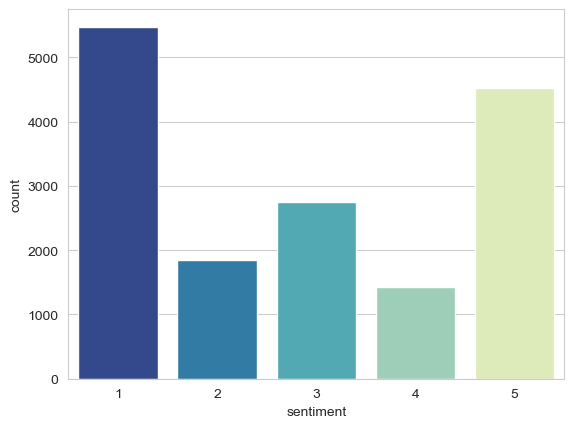

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment',data=df2, palette='YlGnBu_r')

<Axes: xlabel='Polarity_Rating', ylabel='count'>

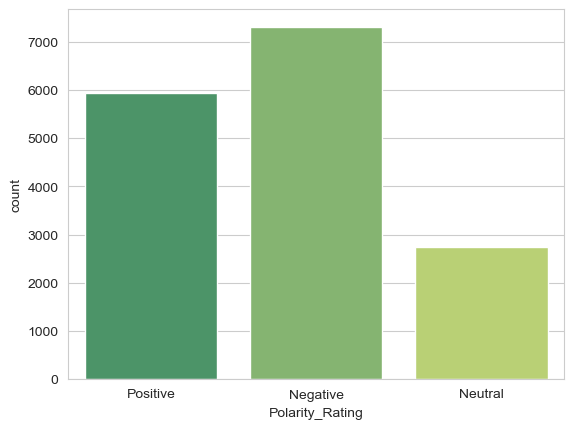

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df2, palette='summer')